# Data Preprocessing

## Importing the libraries

In [21]:
# Downloading and installing libraries to the OS file system
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas

373.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


379.72s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


385.43s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Data.csv')

In [4]:
len(dataset)

10

In [5]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [6]:
dataset.head(7)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No


In [7]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [8]:
dataset.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
dataset.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [11]:
dataset.isnull().any()

Country      False
Age           True
Salary        True
Purchased    False
dtype: bool

In [12]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [13]:
dataset.isnull().sum().sum()

2

In [17]:
X[:, [1,2]]

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, nan],
       [35.0, 58000.0],
       [nan, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

## Taking care of missing data

In [20]:
!pip3 install scikit-learn

267.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [23]:
print(X[:, 1:3])

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63777.77777777778],
       [35.0, 58000.0],
       [38.77777777777778, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

## Visualizing Data

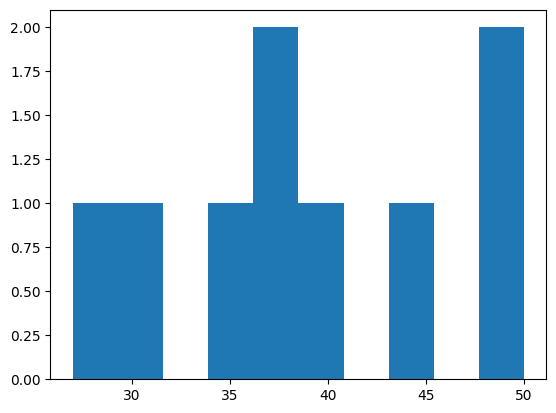

In [14]:
fig = plt.hist(dataset.Age)

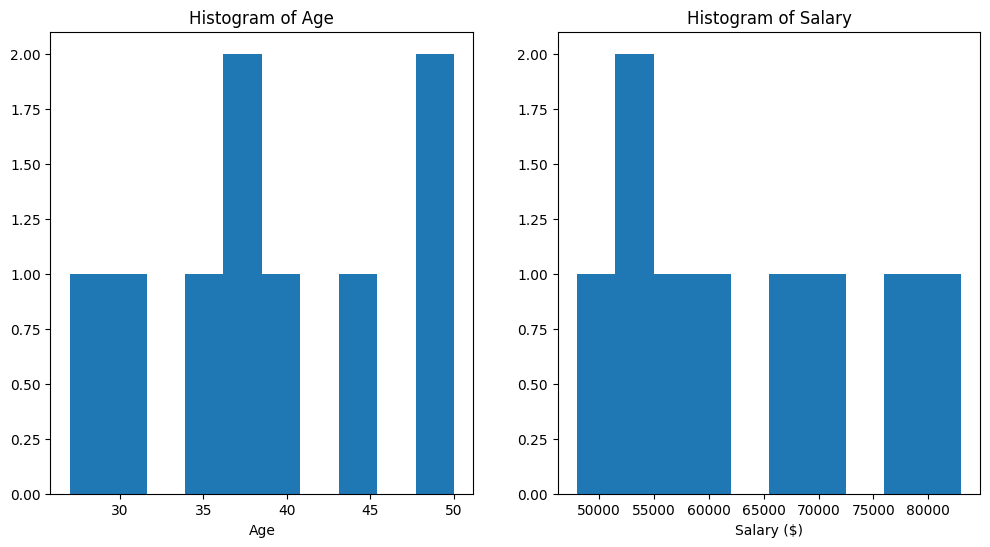

In [15]:
fig = plt.figure(figsize=(12, 6))
age = fig.add_subplot(121)
salary = fig.add_subplot(122)

age.hist(dataset.Age, bins=10)
age.set_xlabel('Age')
age.set_title("Histogram of Age")

salary.hist(dataset.Salary, bins=10)
salary.set_xlabel('Salary ($)')
salary.set_title("Histogram of Salary")

plt.show()


## Feature Scaling

In [ ]:
fig = plt.scatter(dataset.Age, dataset.Salary)

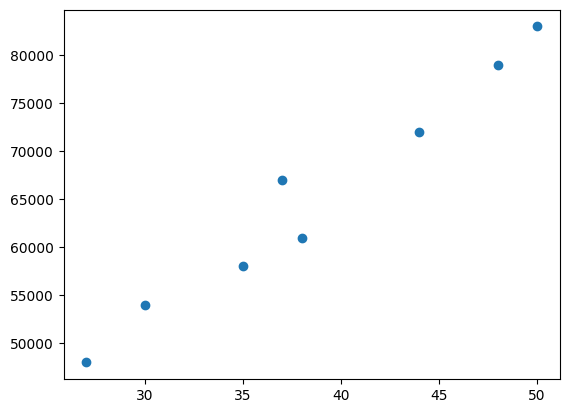

In [ ]:
fig = plt.scatter(dataset.Age, dataset.Salary)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X[:, 1:3])
X[:, 1:3] = sc.transform(X[:, 1:3])

In [25]:
X[:, 1:3]

array([[0.758874361590019, 0.7494732544921677],
       [-1.7115038793306814, -1.4381784072687531],
       [-1.2755547779917342, -0.8912654918285229],
       [-0.1130238410878753, -0.253200423814921],
       [0.17760889313808945, 6.632191985654332e-16],
       [-0.5489729424268225, -0.5266568815350361],
       [0.0, -1.0735697969752662],
       [1.3401398300419485, 1.3875383225057696],
       [1.6307725642679132, 1.7521469327992565],
       [-0.2583402082008577, 0.29371249162530916]], dtype=object)